# Welcome to Image Classification

## 이 노트북은 Image classification에 대한 기본적인 instruction을 제공합니다.

### 해당 Instruction의 목표

- Image classification에서의 training step의 argument 설정
- 

#### 학습을 시작하기 전에 각 데이터에 대한 데이터 경로, 라벨을 포함하는 파일(=ground truth 파일)이 필요합니다.

#### 만약 데이터들이 폴더명이 라벨로 이루어진 폴더 안에 미리 분류되어 있는 경우 다음 함수를 통해 쉽게 ground truth 파일을 생성할 수 있습니다.

#### 그렇지 않은 경우 직접 함수를 구현하여 ground truth 파일을 생성하는 과정이 필요합니다.

In [13]:
# 예시: 아래 주석을 풀어 ground truth 파일을 생성합니다.
# data_type : 값이 png/jpg인 경우 경로 내의 png/jpg 파일에 대해서만 ground truth 파일 생성이진행됩니다.
# png 와 jpg 파일 모두에 대해 진행하고 싶은 경우 data_type = both 로 입력합니다.

# from wrapping import make_ground_truth

# # 데이터들이 미리 분류되어 있는 폴더들의 부모 디렉토리를 입력합니다.
# example_data_path = './data_path_example/'
# example_save_path = './save_path_example/train.csv'
# make_ground_truth(data_path=example_data_path, save_path=example_save_path,data_type='both')

In [1]:
from wrapping import Wrapper

2023-11-14 05:06:28.019148: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-14 05:06:29.219529: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-14 05:06:29.219638: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-14 05:06:29.226264: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-14 05:06:29.898684: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-14 05:06:29.903988: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

아래는 ALO 기본 설정 및 라이브러리 설치 코드입니다. 설치 에러가 발생하면 아래 셀을 재실행 하고, 지속적으로 문제가 있을 시 문의바랍니다

## Train workflow

In [2]:
# 아래는 Train 시 필요한 라이브러리를 설치하는 코드입니다. library 설치 에러가 발생하면 아래 셀을 재실행 해주세요
wrapper = Wrapper(0)

self.pipeline is : train_pipeline
pipelines is : ['train_pipeline', 'inference_pipeline']
[2023-11-14 05:06:39,086][PROCESS][INFO]: You did not write any << s3_private_key_file >> in the config yaml file. When you wanna get data from s3 storage, 
                                 you have to write the s3_private_key_file path or set << ACCESS_KEY, SECRET_KEY >> in your os environment. 

[2023-11-14 05:06:39,092][PROCESS][INFO]:  Skip loading external data. << /nas001/users/ruci.sung/mnist/train/ >> 
 << train >> already exists in << /home/jovyan/icTestDir/ic/alo/input/ >>. 
 & << get_external_data >> is set as << once >>. 

[2023-11-14 05:06:39,095][PROCESS][INFO]: Start setting-up << input >> asset @ << assets >> directory.
[2023-11-14 05:06:39,099][PROCESS][INFO]: << input >> asset had already been created at 2023-11-10 06:42:35.221723
[2023-11-14 05:06:39,102][PROCESS][INFO]: Start setting-up << train >> asset @ << assets >> directory.
[2023-11-14 05:06:39,106][PROCESS][INFO]: << tra

### Input(step=0) asset을 실행합니다.
#### `run` 메소드 안에서 자동으로 iterate 하므로  `step` 값은 입력할 필요 없습니다.

In [3]:
# IC train asset 순서에 따라 step 순서를 입력합니다. : (input(0) - train(1))
## input asset
wrapper.run()


[2023-11-14 05:06:39,258][ASSET][INFO][train_pipeline][input]: 

============================= ASSET START =============================
- time (UTC)        : 2023-11-14 05:06:39
- current step      : input
- asset branch.     : vision_2.0
- alolib ver.       : 2.0
- alo ver.          : release-2.0
- load envs. keys   : dict_keys(['project_home', 'pipeline', 'step', 'num_step', 'artifacts', 'alo_version', 'asset_branch', 'interface_mode', 'load_data', 'load_config', 'save_data', 'save_config', 'log_file_path'])
- load args. keys   : dict_keys(['input_path', 'y_column', 'path_column', 'data_source_type', 'label_names', 'prediction_column_prefix', 'probability_column_prefix', 'set_images'])
- load config. keys : dict_keys(['meta'])
- load data keys    : dict_keys([])


>>>>> Load path : ['/home/jovyan/icTestDir/ic/alo/input/train//']
/home/jovyan/icTestDir/ic/alo/.asset_interface/train_pipeline/ 폴더와 하위 디렉토리가 삭제되었습니다.
/home/jovyan/icTestDir/ic/alo/.asset_interface/train_pipeline/ 폴더가 생성되었

/home/jovyan/icTestDir/ic/alo/assets/input/data_input.py:265: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['new_image_path'] = data.apply(save_image_as_npy, axis=1)
/home/jovyan/icTestDir/ic/alo/assets/input/data_input.py:268: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[self.path_column] = data['new_image_path']
/home/jovyan/icTestDir/ic/alo/assets/input/data_input.py:271: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the document

### train asset args 변경하기

##### train asset의 args수정 및 확인

- 필요한경우 ic_args의 항목을 ***ic_args[argument명]=value입력*** 을 통해 변경할 수 있습니다.  

In [4]:
# IC train asset 순서에 따라 step 순서(값)를 입력합니다. (input(0) - train(1))
ic_args = wrapper.get_args(step=1)

# 아래 주석을 풀어 ic_args를 수정합니다.
# ic_args['epochs] = 1024
ic_args

{'model_type': 'mobilenetv1',
 'input_shape': [28, 28, 1],
 'resize_shape': [224, 224, 3],
 'epochs': 10,
 'batch_size': 64,
 'train_ratio': 0.8,
 'rand_augmentation': False,
 'num_aug': 3,
 'aug_magnitude': 7,
 'exclude_aug_lst': ['Rotate', 'Solarize', 'Color', 'Posterize', 'Brightness']}

## 다음 과정들을 통해 IC asset들의 argument들을 customize 할 수 있습니다.

----
### arguments 설명

|args|explanation|default|example|data type|necessary|
|---|---|---|---|---|---|
|model_type|이미지 분류를 위한 네트워크 모델 타입|`mobilenetv1`|`mobilenetv1, high_resolution`|str|yes|
|resize_shape|resizing 후의 이미지 shape|[224,224,3]|[224,224,3]|list|yes|
|epochs|training epochs 횟수|10|10|int|no|
|batch_size|미니 배치 크기|64|64|int|no|
|train_ratio|tratin/validation dataset 분할 시 train dataset 비율|`0.8`|`0 ~ 1.0`|float|no|
|rand_augmentation|random augmentation 사용 여부|False|False|bool|no|
|num_aug|이미지 당 num_aug 횟수 만큼 random augmenation을 iterative 하게 적용합니다 |`3`|`1~16`|int|no|
|aug_magnitude|random augmenation 적용 세기 |`7`|`0~10`|float|no|
|exclude_aug_lst|제외하고 싶은 random augmentation 기법 리스트|[]|[Rotate,Solarize,Color]|list|no|

 

### A. training step에서 필요한 하이퍼파라미터를 설정합니다.


#### A-1. 기본적인 하이퍼파리미터


- resize_shape : 모든 이미지들을 해당 크기로 변환합니다.
- epochs : traing epoch를 설정합니다. 너무 작으면 학습이 완료되지 않고, 너무 크면 학습에 너무 오랜 기간이 걸릴 수 있습니다.
- batch_size : 미니 배치 사이즈를 설정합니다. 너무 큰 값을 설정하면 학습 환경에 따라 학습이 되지 않을 수 있습니다.
- train_ratio : input dataset을 train dataset, validation dataset으로 분할 시 train set의 비율을 설정합니다.
- rand_augmentation : 이미지 전처리 시 random augmentation을 사용할 지 여부를 설정합니다.


In [5]:
ic_args['resize_shape'] = [224,224,3]
ic_args['epochs'] = 2
ic_args['batch_size'] = 128
ic_args['train_ratio'] = 0.85
ic_args['rand_augmentation'] = True

#### A-2. Random augmentation 사용 시 파라미터를 설정합니다. 사용하지 않으면 아래 arg는 입력하지 않아도 됩니다.


- num_aug : random augmentation 시 각 이미지는 num_aug 수 만큼 iterative 하게 random augmentation이 적용됩니다. 1~16 사이의 int값을 입력합니다.
- aug_magnitude: random augmentation 시 aug_magnitude 만큼의 세기로 augmentation을 적용합니다. 해당 값은 random augmentation에 사용되는 모든 기법에 동일하게 적용됩니다.
- exclude_aug_lst : random augmentation 시 경우에 따라 불필요하거나 오히려 performance를 저하시킨다고 의심되는 기법들을 exclude_aug_lst에 포함시키면 해당 기법은 random augmentation에서 제외됩니다. 가능한 기법들은 다음과 같이 16개 입니다.

|번호|augmentation 기법|
|---|---|
|1|SolarizeAdd|
|2|Invert|
|3|Cutout|
|4|AutoContrast|
|5|Equalize|
|6|Rotate|
|7|Solarize|
|8|Color|
|9|Posterize|
|10|Contrast|
|11|Brightness|
|12|Sharpness|
|13|ShearX|
|14|ShearY|
|15|TranslateX|
|6|TranslateY|





In [6]:
ic_args['num_aug'] = 8
ic_args['aug_magnitude'] = 5
ic_args['exclude_aug_lst'] = ['Rotate','Posterize','ShearY']

In [7]:
wrapper.run(args=ic_args) # 변경한 ic_args 반영
# wrapper.data: ic asset의 결과물입니다. 다음 asset 실행 시 필요합니다. 
# wrapper.config: ic asset의 결과 config입니다. 다음 asset실행 시 필요합니다. 

# preprocess asset의 결과 dataframe은 wrapper.data['dataframe']으로 확인할 수 있습니다. 
wrapper.data['dataframe'].head(10) 

[2023-11-14 05:06:44,549][ASSET][INFO][train_pipeline][train]: 

============================= ASSET START =============================
- time (UTC)        : 2023-11-14 05:06:44
- current step      : train
- asset branch.     : main
- alolib ver.       : 2.0
- alo ver.          : release-2.0
- load envs. keys   : dict_keys(['project_home', 'pipeline', 'step', 'num_step', 'artifacts', 'alo_version', 'asset_branch', 'interface_mode', 'load_data', 'load_config', 'save_data', 'save_config', 'log_file_path', 'prev_step'])
- load args. keys   : dict_keys(['model_type', 'input_shape', 'resize_shape', 'epochs', 'batch_size', 'train_ratio', 'rand_augmentation', 'num_aug', 'aug_magnitude', 'exclude_aug_lst'])
- load config. keys : dict_keys(['meta', 'x_columns', 'y_column', 'path_column', 'label_names', 'prediction_column_prefix', 'probability_column_prefix'])
- load data keys    : dict_keys(['dataframe'])


[2023-11-14 05:06:44,552][ASSET][INFO][train_pipeline][train]: Successfully got model p

/home/jovyan/conda/envs/ic/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
2023-11-14 05:09:13.438375: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2023-11-14 05:09:13.438458: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2023-11-14 05:09:13.440316: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmpc53tx61m
2023-11-14 05:09:13.464851: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2023-11-14 05:09:13.464880: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /tmp/tmpc53tx61m
2023-11-14 05:09:13.498841: I tensorflow/compiler/mlir/mlir_graph

[2023-11-14 05:09:15,747][ASSET][INFO][train_pipeline][train]: 

============================= ASSET FINISH ===========================
- time (UTC)        : 2023-11-14 05:09:15
- current step      : train
- save config. keys : dict_keys(['meta', 'x_columns', 'y_column', 'path_column', 'label_names', 'prediction_column_prefix', 'probability_column_prefix'])
- save data keys    : dict_keys(['dataframe', 'df_confusion', 'eval_score', 'original_image_dataset', 'augmented_image_dataset'])


[2023-11-14 05:09:15,750][PROCESS][INFO]: ==================== Finish pipeline: train_pipeline / step: train
dataframe <class 'pandas.core.frame.DataFrame'>
df_confusion <class 'pandas.core.frame.DataFrame'>
eval_score <class 'dict'>
original_image_dataset <class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
augmented_image_dataset <class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>

model_type <class 'str'>
input_shape <class 'list'>
resize_shape <class 'list'>
epochs <class 

,image_path,label,pred_label,prob_0,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9
0,/home/jovyan/icTestDir/ic/alo/.asset_interface...,7,7,0.000353,0.024122,0.001810,0.007921,0.002499,0.043085,0.003365,0.846806,0.065815,0.004226
1,/home/jovyan/icTestDir/ic/alo/.asset_interface...,7,7,0.001096,0.117868,0.003224,0.044793,0.014148,0.130867,0.008724,0.524998,0.142278,0.012003
2,/home/jovyan/icTestDir/ic/alo/.asset_interface...,7,7,0.000307,0.048643,0.000867,0.009980,0.001932,0.046588,0.003333,0.813734,0.069733,0.004883
3,/home/jovyan/icTestDir/ic/alo/.asset_interface...,8,8,0.010536,0.134992,0.005730,0.204813,0.022391,0.033598,0.017932,0.070653,0.480732,0.018622
4,/home/jovyan/icTestDir/ic/alo/.asset_interface...,4,3,0.024704,0.052929,0.022487,0.653980,0.100398,0.004964,0.053868,0.022615,0.044586,0.019470
5,/home/jovyan/icTestDir/ic/alo/.asset_interface...,3,3,0.014836,0.087621,0.005595,0.860448,0.009652,0.002123,0.002574,0.004155,0.010933,0.002063
6,/home/jovyan/icTestDir/ic/alo/.asset_interface...,3,3,0.006313,0.083999,0.002089,0.896038,0.002709,0.001410,0.001598,0.002204,0.002054,0.001586
7,/home/jovyan/icTestDir/ic/alo/.asset_interface...,1,3,0.002831,0.216288,0.002959,0.762888,0.002953,0.001466,0.001618,0.002065,0.004921,0.002011
8,/home/jovyan/icTestDir/ic/alo/.asset_interface...,6,3,0.026132,0.089779,0.024585,0.703744,0.069773,0.003737,0.031352,0.008203,0.024884,0.017812
9,/home/jovyan/icTestDir/ic/alo/.asset_interface...,1,1,0.006060,0.454585,0.002879,0.429567,0.007012,0.006982,0.006377,0.038463,0.039096,0.008979


<br>

## Inference workflow 

In [8]:
# 아래는 Inference 시 필요한 라이브러리를 설치하는 코드입니다. library 설치 에러가 발생하면 아래 셀을 재실행 해주세요
wrapper = Wrapper(1)

self.pipeline is : inference_pipeline
pipelines is : ['train_pipeline', 'inference_pipeline']
[2023-11-14 05:09:41,337][PROCESS][INFO]: You did not write any << s3_private_key_file >> in the config yaml file. When you wanna get data from s3 storage, 
                                 you have to write the s3_private_key_file path or set << ACCESS_KEY, SECRET_KEY >> in your os environment. 

[2023-11-14 05:09:41,340][PROCESS][INFO]:  Skip loading external data. << /nas001/users/ruci.sung/mnist/test/ >> 
 << test >> already exists in << /home/jovyan/icTestDir/ic/alo/input/ >>. 
 & << get_external_data >> is set as << once >>. 

[2023-11-14 05:09:41,342][PROCESS][INFO]: Start setting-up << input >> asset @ << assets >> directory.
[2023-11-14 05:09:41,345][PROCESS][INFO]: Now << local >> asset_source_code mode: <input> asset exists.
[2023-11-14 05:09:41,348][PROCESS][INFO]: Start setting-up << inference >> asset @ << assets >> directory.
[2023-11-14 05:09:41,351][PROCESS][INFO]: << inferenc

In [9]:
# IC inference asset 순서에 따라 step 순서를 입력합니다.: (input(0) - train(1))
## input asset
wrapper.run() 


[2023-11-14 05:09:41,408][ASSET][INFO][inference_pipeline][input]: 

============================= ASSET START =============================
- time (UTC)        : 2023-11-14 05:09:41
- current step      : input
- asset branch.     : vision
- alolib ver.       : 2.0
- alo ver.          : release-2.0
- load envs. keys   : dict_keys(['project_home', 'pipeline', 'step', 'num_step', 'artifacts', 'alo_version', 'asset_branch', 'interface_mode', 'load_data', 'load_config', 'save_data', 'save_config', 'log_file_path'])
- load args. keys   : dict_keys(['input_path', 'y_column', 'data_source_type', 'path_column', 'set_images'])
- load config. keys : dict_keys(['meta'])
- load data keys    : dict_keys([])


>>>>> Load path : ['/home/jovyan/icTestDir/ic/alo/input/test//']
/home/jovyan/icTestDir/ic/alo/.asset_interface/inference_pipeline/ 폴더와 하위 디렉토리가 삭제되었습니다.
/home/jovyan/icTestDir/ic/alo/.asset_interface/inference_pipeline/ 폴더가 생성되었습니다.
[2023-11-14 05:09:46,306][ASSET][INFO][inference_pipeline][i

/home/jovyan/icTestDir/ic/alo/assets/input/data_input.py:265: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['new_image_path'] = data.apply(save_image_as_npy, axis=1)
/home/jovyan/icTestDir/ic/alo/assets/input/data_input.py:268: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[self.path_column] = data['new_image_path']
/home/jovyan/icTestDir/ic/alo/assets/input/data_input.py:271: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the document

<br>

### inference asset 
##### inference asset의 args수정 및 확인
- 필요한경우 ic_args의 항목을 ***ic_args[argument명]=value입력*** 을 통해 변경할 수 있습니다.  

In [10]:
# IC inference asset 순서에 따라 step 순서를 입력합니다. (input(0) - inference(1))
ic_args = wrapper.get_args(step=1)

# 아래 주석을 풀어 ic_args를 수정합니다. 
# ic_args['model_type'] = 
ic_args

{'none': None}

##### inference asset 실행 

In [11]:
wrapper.run(args=ic_args) # 변경한 ic_args 반영
# wrapper.data: IC asset의 결과물입니다. 
# wrapper.config: IC asset의 결과 config입니다. 

# ic asset의 결과 dataframe은 wrapper.data['dataframe']으로 확인할 수 있습니다. 
wrapper.data['dataframe'].head(10) 

[2023-11-14 05:09:46,359][ASSET][INFO][inference_pipeline][inference]: 

============================= ASSET START =============================
- time (UTC)        : 2023-11-14 05:09:46
- current step      : inference
- asset branch.     : main
- alolib ver.       : 2.0
- alo ver.          : release-2.0
- load envs. keys   : dict_keys(['project_home', 'pipeline', 'step', 'num_step', 'artifacts', 'alo_version', 'asset_branch', 'interface_mode', 'load_data', 'load_config', 'save_data', 'save_config', 'log_file_path', 'prev_step'])
- load args. keys   : dict_keys(['none'])
- load config. keys : dict_keys(['meta', 'x_columns', 'y_column', 'path_column', 'label_names', 'prediction_column_prefix', 'probability_column_prefix'])
- load data keys    : dict_keys(['dataframe'])


[2023-11-14 05:09:46,362][ASSET][INFO][inference_pipeline][inference]: Successfully got model path for saving or loading your AI model: 
 /home/jovyan/icTestDir/ic/alo/.train_artifacts/models/train/
[2023-11-14 05:09:46

,image_path,label,pred_label,prob_0,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9
0,/home/jovyan/icTestDir/ic/alo/.asset_interface...,6,3,0.018907,0.111037,0.005223,0.739996,0.021762,0.005245,0.033130,0.010830,0.041247,0.012621
1,/home/jovyan/icTestDir/ic/alo/.asset_interface...,3,3,0.009994,0.123275,0.002802,0.838425,0.005095,0.002762,0.002469,0.004781,0.008086,0.002310
2,/home/jovyan/icTestDir/ic/alo/.asset_interface...,5,1,0.012915,0.249528,0.003647,0.161003,0.004900,0.171095,0.020635,0.147356,0.177680,0.051241
3,/home/jovyan/icTestDir/ic/alo/.asset_interface...,2,3,0.048262,0.084422,0.057792,0.719845,0.045466,0.003658,0.006855,0.008478,0.018774,0.006446
4,/home/jovyan/icTestDir/ic/alo/.asset_interface...,6,3,0.023203,0.098584,0.030594,0.665340,0.054659,0.004192,0.035978,0.017854,0.051566,0.018030
5,/home/jovyan/icTestDir/ic/alo/.asset_interface...,2,3,0.019228,0.089779,0.010195,0.611995,0.148998,0.002883,0.058520,0.016841,0.024330,0.017232
6,/home/jovyan/icTestDir/ic/alo/.asset_interface...,8,8,0.010075,0.048630,0.012421,0.060130,0.015517,0.008361,0.006793,0.088194,0.744266,0.005613
7,/home/jovyan/icTestDir/ic/alo/.asset_interface...,9,8,0.007437,0.072907,0.007468,0.075725,0.017466,0.032452,0.013588,0.257501,0.454720,0.060737
8,/home/jovyan/icTestDir/ic/alo/.asset_interface...,5,8,0.001490,0.064410,0.002135,0.036846,0.007807,0.259330,0.005513,0.291096,0.316110,0.015264
9,/home/jovyan/icTestDir/ic/alo/.asset_interface...,1,3,0.002706,0.257294,0.002460,0.717867,0.003286,0.001859,0.002388,0.003261,0.006119,0.002759


test
10    /nas001/users/ruci.sung/mnist/fashion_mnist_im...
11    /nas001/users/ruci.sung/mnist/fashion_mnist_im...
12    /nas001/users/ruci.sung/mnist/fashion_mnist_im...
13    /nas001/users/ruci.sung/mnist/fashion_mnist_im...
14    /nas001/users/ruci.sung/mnist/fashion_mnist_im...
Name: image_path, dtype: object
255
255
255
255
255


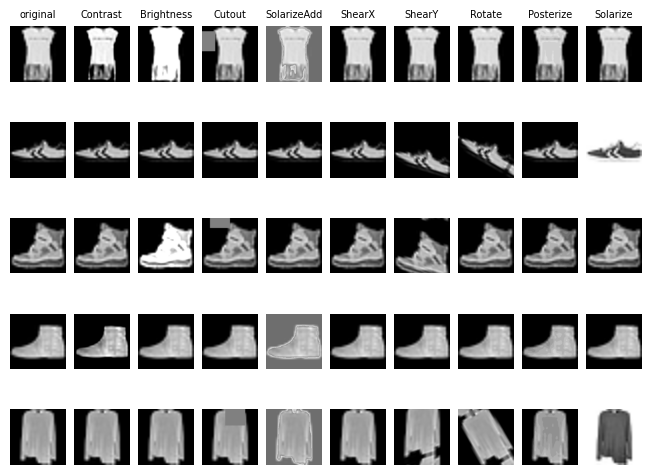

In [53]:
import os
from PIL import Image
import numpy as np
import tensorflow as tf
from  augment import RandAugment
import copy

def make_auged_images(img_path_lst,resize_shape,aug_lst=None):
    
    available_aug_lst = [
        'AutoContrast', 'Equalize', 'Invert', 'Rotate', 'Posterize', 'Solarize',
        'Color', 'Contrast', 'Brightness', 'Sharpness', 'ShearX', 'ShearY',
        'TranslateX', 'TranslateY', 'Cutout', 'SolarizeAdd'
    ]
    
    if aug_lst == None:
        aug_lst = copy.deepcopy(available_aug_lst)
    
    def load_image(img_path, target_size):
        image = Image.open(img_path)
        if image is not None:
            image = np.array(image)
            print(np.max(image))
        else:
            raise Exception('failed to open image')

        if len(image.shape) != 3:
            image = tf.expand_dims(image, axis=-1)
        image = tf.image.resize(image, target_size)  # 이미지 리사이징
        if image.shape[2] != 3:
            image = tf.tile(image, [1, 1, 3])
        return image
    
    total_image_result = [[] for i in range(len(img_path_lst))]
    
    for img_idx , each_img_path in enumerate(img_path_lst):
        
        original_image = load_image(img_path=each_img_path,target_size=resize_shape[:2])
        total_image_result[img_idx].append(original_image)
        for each_aug in aug_lst:
            
            randaugmenter = RandAugment(num_layers=1, exclude_ops = [i for i in available_aug_lst if i != each_aug])
            auged_image = randaugmenter.distort(original_image)
            
            total_image_result[img_idx].append(auged_image)
    
    aug_lst.insert(0,'original')
    return total_image_result, len(total_image_result), aug_lst

import matplotlib.pyplot as plt
def plot_auged_images(auged_images_lst,img_len,aug_lst):
    
    fig, axes = plt.subplots(nrows=img_len , ncols=len(aug_lst),constrained_layout=True)
    
    for each_image_idx in range(img_len):
        for each_aug_idx in range(len(aug_lst)):
            if each_image_idx == 0:
                axes[each_image_idx][each_aug_idx].set_title(aug_lst[each_aug_idx],fontsize=7)
            axes[each_image_idx][each_aug_idx].imshow(auged_images_lst[each_image_idx][each_aug_idx]/255)
            axes[each_image_idx][each_aug_idx].axis('off')
                
    plt.show()
    
    
    
            
trainCsvDir = '/home/jovyan/icTestDir/ic/alo/input/train/train_image_paths_labels.csv'
import pandas as pd
print('test')

csvLoad = pd.read_csv(trainCsvDir)
csvLst = csvLoad.iloc[10:15,0]
print(csvLst)

imgLst,imgLen,augLen = make_auged_images(img_path_lst=csvLst,
                                         resize_shape=[224,224,3],
                                         aug_lst=['Contrast', 'Brightness', 'Cutout', 'SolarizeAdd','ShearX', 'ShearY','Rotate', 'Posterize', 'Solarize'])
plot_auged_images(auged_images_lst=imgLst,img_len=imgLen,aug_lst=augLen)
    
    
    

    

(128, 224, 224, 3) (128, 10)
(128, 224, 224, 3) (128, 10)
(128, 224, 224, 3) (128, 10)
(128, 224, 224, 3) (128, 10)
(128, 224, 224, 3) (128, 10)
(128, 224, 224, 3) (128, 10)
(128, 224, 224, 3) (128, 10)
(128, 224, 224, 3) (128, 10)
(128, 224, 224, 3) (128, 10)
(128, 224, 224, 3) (128, 10)
